Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:
df = pd.read_csv("C:/Users/Godwin/Documents/Workflow/ML Zoomcamp/Dataset/Car Features/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


String Formating

In [3]:
#Column String Formating

df.columns = df.columns.str.lower().str.replace(' ','_')

#Row String Formating
string_dtype = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_dtype:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [4]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [5]:
#Checking for null values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

Filling missing values

In [7]:
#Filling Engine_fuel_type with the mode of the column
df['engine_fuel_type'].fillna(df['engine_fuel_type'].mode()[0], inplace = True)

#Filling engine_hp with mean of the column
df['engine_hp'].fillna(df['engine_hp'].mean(), inplace = True)

#Filling engine_cylinder with mean of the column
df['engine_cylinders'].fillna(df['engine_cylinders'].mean(), inplace = True)

#Dropping the market_category column
df.drop(['market_category'], axis = 1, inplace = True)

#Filling no_of_doors with mode
df['number_of_doors'].fillna(df['number_of_doors'].mode()[0], inplace = True)

In [8]:
#Checking for null values
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [9]:
column  = []
no_unique = []
first_5_unique = []
categorical_cols = df.dtypes[df.dtypes == 'object'].index.tolist()

for col in categorical_cols:
    column.append(col)
    no_unique.append(df[col].nunique())
    first_5_unique.append(df[col].value_counts().head(5).index.tolist())

data = {'Name': column, 'No_unique_value': no_unique, 'First Five': first_5_unique}
data = pd.DataFrame(data)
data

,Name,No_unique_value,First Five
0,make,48,"[chevrolet, ford, volkswagen, toyota, dodge]"
1,model,914,"[silverado_1500, tundra, f-150, sierra_1500, b..."
2,engine_fuel_type,10,"[regular_unleaded, premium_unleaded_(required)..."
3,transmission_type,5,"[automatic, manual, automated_manual, direct_d..."
4,driven_wheels,4,"[front_wheel_drive, rear_wheel_drive, all_whee..."
5,vehicle_size,3,"[compact, midsize, large]"
6,vehicle_style,16,"[sedan, 4dr_suv, coupe, convertible, 4dr_hatch..."


Exploratory Data Analysis

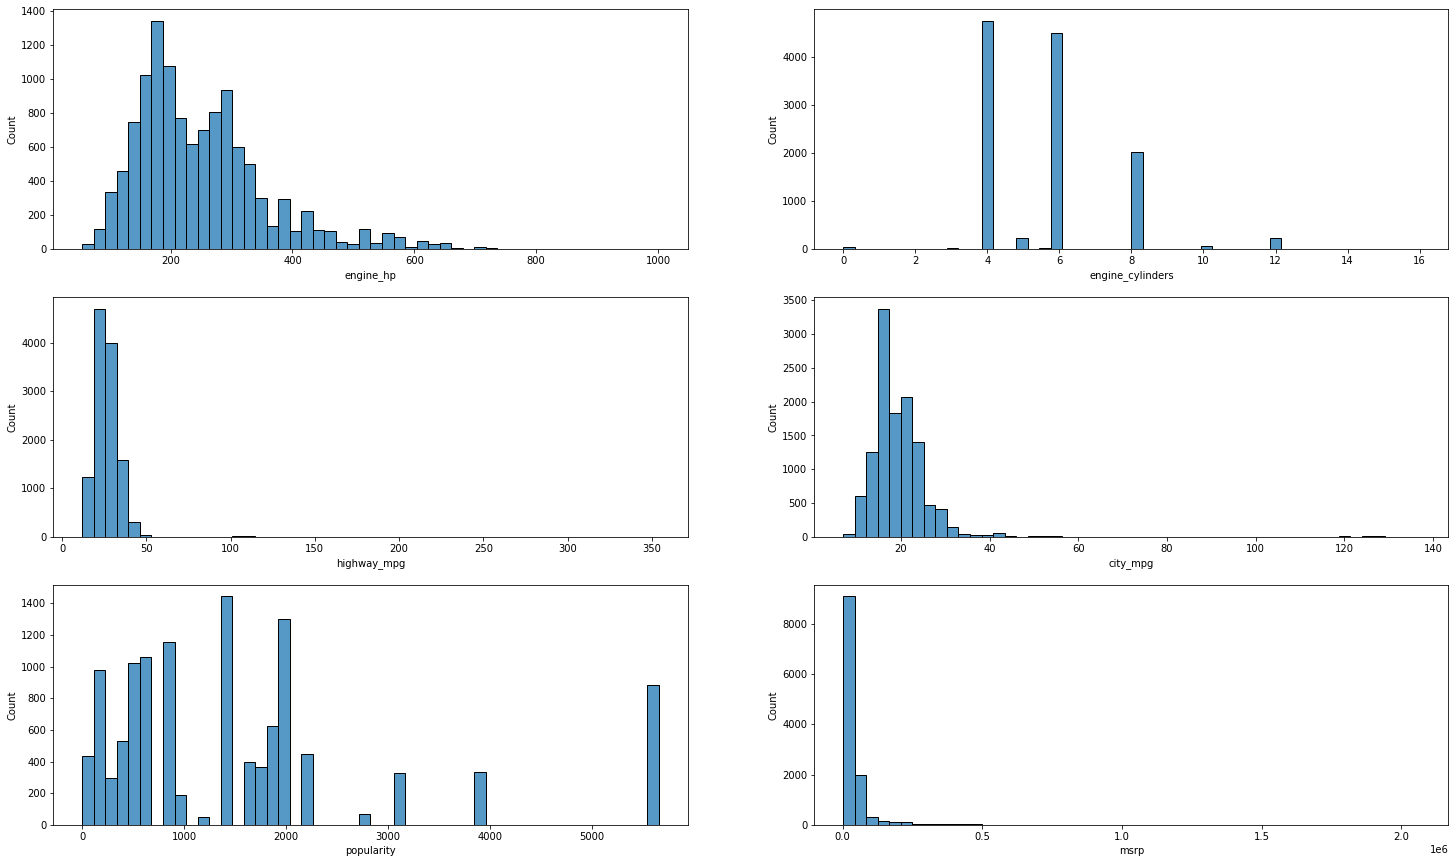

In [10]:
#Visualizing Data Distributions
numerical_cols = df.dtypes[df.dtypes !='object'].index.tolist()
numerical_cols.remove('year')
numerical_cols.remove('number_of_doors')

plt.figure(figsize = (25,15))
rows = int(len(numerical_cols)/2)
for i,col in enumerate(numerical_cols):
    plt.subplot(rows, 2, i+1)
    sns.histplot(df[col], bins = 50)

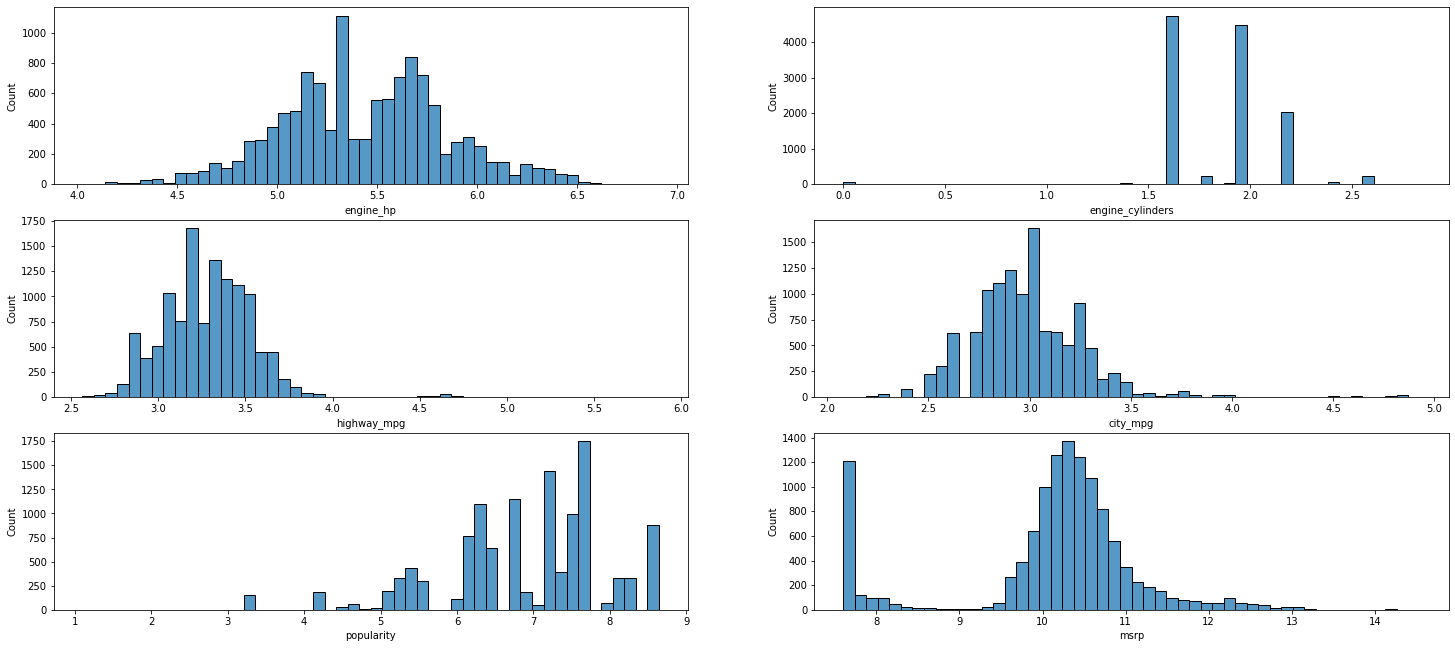

In [11]:
#Visualizing Data Distributions wit log tranform
numerical_cols = df.dtypes[df.dtypes !='object'].index.tolist()
numerical_cols.remove('year')
numerical_cols.remove('number_of_doors')

plt.figure(figsize = (25,15))
rows = int(len(numerical_cols)/2 +1 )
for i,col in enumerate(numerical_cols):
    plt.subplot(rows, 2, i+1)
    sns.histplot(np.log1p(df[col]), bins = 50)

From the visualization above Engine_hp, City_MPG, Msrp have normal/almost normal distributions. 
The Highway distribution has a normal distribution but the presence of outlier after 4.0
Population and Engine_cylinders do not have a normal distribution

Showing Relationship between independent features and the target

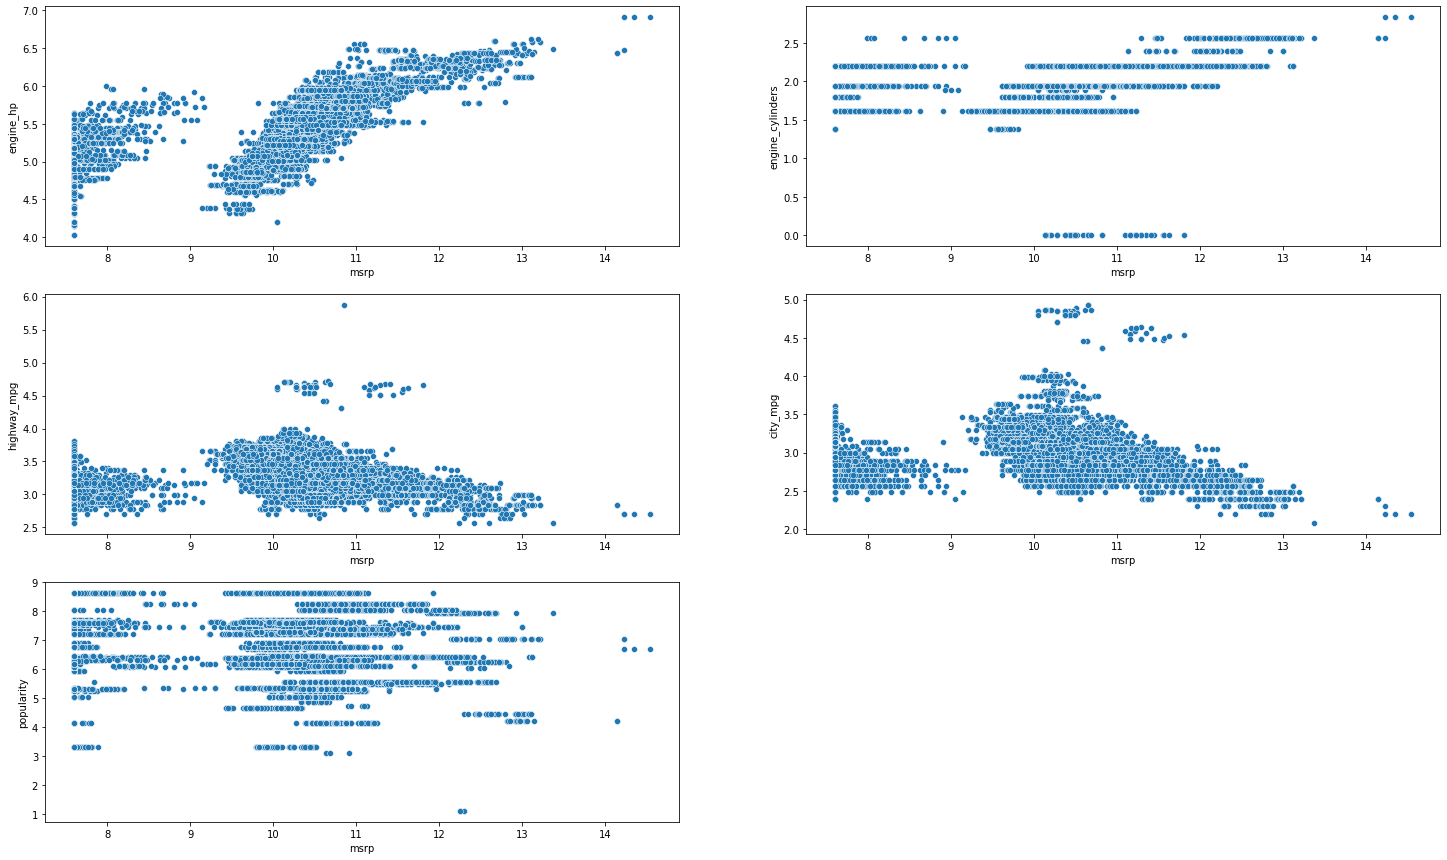

In [12]:
#Visualizing relationship between numerical columns and the target
numerical_cols.remove('msrp')
plt.figure(figsize=(25, 15))
row = int(len(numerical_cols)/2 +1)
for i,col in enumerate(numerical_cols):
    plt.subplot(row, 2, i+1)
    sns.scatterplot(x= np.log1p(df['msrp']), y = np.log1p(df[col]))

<AxesSubplot:>

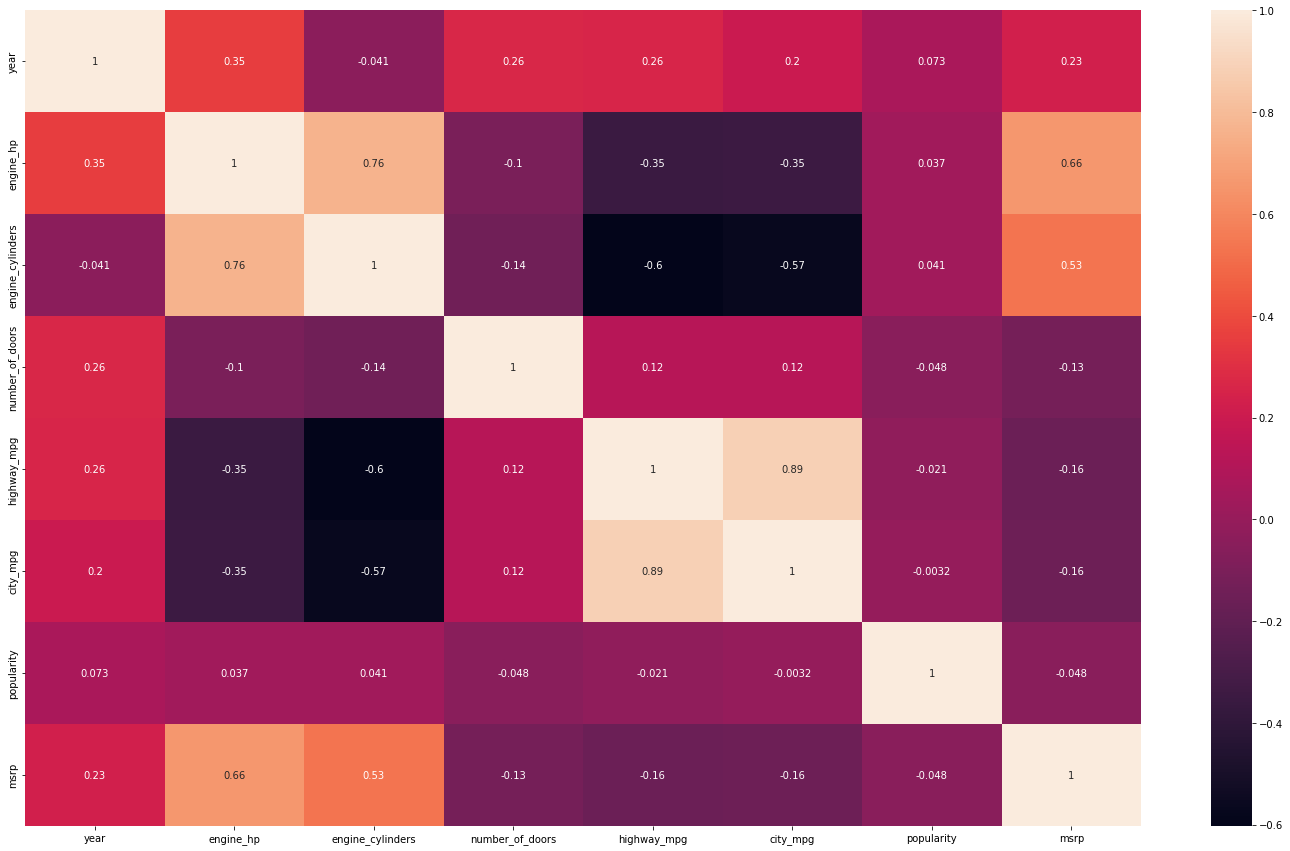

In [13]:
plt.figure(figsize=(25,15))
corre=df.corr()
sns.heatmap(corre, annot= True)

Dropping Correlating Columns

In [14]:
df.drop(['city_mpg', 'engine_cylinders'], axis = 1, inplace = True)

In [15]:
df['msrp'] = np.log1p(df['msrp'])

df.head()

,make,model,year,engine_fuel_type,engine_hp,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,manual,rear_wheel_drive,2.0,compact,coupe,26,3916,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,manual,rear_wheel_drive,2.0,compact,convertible,28,3916,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,manual,rear_wheel_drive,2.0,compact,coupe,28,3916,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,manual,rear_wheel_drive,2.0,compact,coupe,28,3916,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,manual,rear_wheel_drive,2.0,compact,convertible,28,3916,10.448744


Data Preparation

In [16]:
base = ['engine_hp',  'highway_mpg' ,'popularity']
values = df['number_of_doors'].unique().tolist()

object_col = df.dtypes[df.dtypes == 'object'].index.tolist()
categorical = {}
for i in object_col:
    categorical[i] = df[i].value_counts().head().index.tolist()

#Encoding Text data
def prepare_df(df):

    df = df.copy()
    features = base.copy()

    #Feature Engineering
    df['age'] = 2017 - df['year']
    features.append('age')

    for i in [2.0, 4.0, 3.0]:
        df['number_of_ %s _doors' %i] = (df['number_of_doors'] == i).astype('int')
        features.append('number_of_ %s _doors' %i)

    for i,values in categorical.items():
        for v in values:
            df['%s_%s' %(i,v)] = (df[i] == v).astype('int')
            features.append('%s_%s' %(i,v))

    df_num = df[features]

    df_num = df_num.fillna(0)
    df_num = df_num.values
    return df_num

In [17]:
#Spliting The Data

def splitting_data(df):

    df = df.copy()
        
    n = len(df)
    n_test = int(n * 0.2)
    n_val = int(n * 0.2)
    n_train = n - n_test - n_val

    idx = np.arange(n)
    np.random.shuffle(idx)

    train_df = df.iloc[idx[:n_train]]
    test_df = df.iloc[idx[n_train: n_train + n_test]]
    val_df = df.iloc[idx[n_train + n_test: ]]

    y_train = train_df.loc[:,'msrp']
    y_test = test_df.loc[:,'msrp']
    y_val = val_df.loc[:,'msrp']

    del train_df['msrp']
    del test_df['msrp']
    del val_df['msrp']

    train_df = prepare_df(train_df)
    test_df = prepare_df(test_df)
    val_df = prepare_df(val_df)

    return train_df,y_train, test_df, y_test, val_df, y_val

Creating Model

In [18]:
def linear_regressiom(x_train,y):
    ones = np.ones(x_train.shape[0])
    data = np.column_stack([ones, x_train])

    XTX = np.dot(data.T, data)
    inverse = np.linalg.inv(XTX)
    out = np.dot(inverse, data.T)
    w = np.dot(out,y)
    return w[0], w[1:]

def linear_regressiom_regul(x_train,y, r):
    ones = np.ones(x_train.shape[0])
    data = np.column_stack([ones, x_train])

    XTX = np.dot(data.T, data)
    XTX = XTX + r * np.eye(XTX.shape[0])
    inverse = np.linalg.inv(XTX)
    out = np.dot(inverse, data.T)
    w = np.dot(out,y)
    return w[0], w[1:]


def rms(actual, predicted):
    rms = actual - predicted
    rms = np.square(rms)
    rms = rms.mean()

    return np.sqrt(rms)

In [19]:
train_df,y_train, test_df, y_test, val_df, y_val = splitting_data(df)

Training the model

In [20]:
b, w = linear_regressiom(train_df, y_train)
new_pred = b + train_df.dot(w)
print(rms(y_train, new_pred))

67.08728639949416


Training with Regularization

In [21]:
b, w = linear_regressiom_regul(train_df, y_train, r = 0.001)
new_pred = b + train_df.dot(w)
print(rms(y_train, new_pred))

0.45925212192787845


<AxesSubplot:xlabel='msrp', ylabel='Count'>

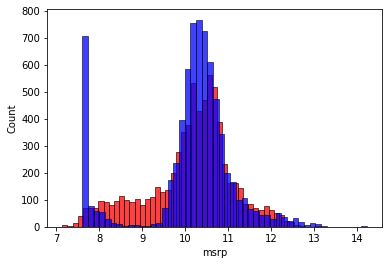

In [22]:
sns.histplot(new_pred, color = 'red', bins = 50)
sns.histplot(y_train, color = 'blue', bins = 50)

Tuning

In [23]:
#Checking for the best regularization parameter
for i in([0.1,0.001,0.0001,0.00001,100]):
    b, w = linear_regressiom_regul(train_df, y_train, r = i)
    val_pred = b + np.dot(val_df, w)
    rmse = rms(y_val, val_pred)
    print('Regularization parameter value ', i , ' has a root mean square error of ', rmse)

Regularization parameter value  0.1  has a root mean square error of  0.46982641298134703
Regularization parameter value  0.001  has a root mean square error of  0.469768926561146
Regularization parameter value  0.0001  has a root mean square error of  0.469768412712811
Regularization parameter value  1e-05  has a root mean square error of  0.4697683374157953
Regularization parameter value  100  has a root mean square error of  0.5743721947006859


In [24]:
n = len(df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

idx = np.arange(n)
np.random.shuffle(idx)

train_df = df.iloc[idx[:n_train]]
test_df = df.iloc[idx[n_train: n_train + n_test]]
val_df = df.iloc[idx[n_train + n_test: ]]

y_train = train_df.loc[:,'msrp']
y_test = test_df.loc[:,'msrp']
y_val = val_df.loc[:,'msrp']

del train_df['msrp']
del test_df['msrp']
del val_df['msrp']

Concatenating the training and validation data and modeling it

In [25]:
full_data = pd.concat([train_df,val_df])
full_data = full_data.reset_index(drop = True)
full_data = prepare_df(full_data)
label = pd.concat([y_train, y_val])

bais, weight = linear_regressiom_regul(full_data, label, r = 0.1)

test = prepare_df(test_df)
test_data_pred = bais + np.dot(test, weight)
rmse = rms(y_test, test_data_pred)

print('The model has a root mean squared error of ', rmse)

(2382, 39)
0.4717065759188785


Testing the Model on new Data

In [26]:
actuals = []
predicted = []
cols = np.random.randint(1,100, 10)

for i in cols:
    car = test_df.iloc[i].to_dict()
    df = pd.DataFrame([car])
    data = prepare_df(df)
    y_pred = bais + np.dot(data, weight)
    y_pred = y_pred[0]
    value = np.expm1(y_pred)
    predicted.append(value)
    actual = np.expm1(y_test.iloc[i])
    actuals.append(actual)

output_data = {'Column':cols, 'Actual Value': actuals, 'Predicted Value': predicted}
output = pd.DataFrame(output_data)
output

,Column,Actual Value,Predicted Value
0,19,30025.0,44137.920631
1,62,25900.0,36120.042449
2,73,41700.0,29230.027646
3,11,2000.0,6702.458253
4,12,26530.0,27656.739047
5,71,45400.0,40419.244436
6,77,24510.0,19900.909535
7,27,39600.0,45178.558531
8,10,2000.0,1919.145676
9,7,38335.0,32096.606923
